In [3]:
pip install kaggle

In [4]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
# API to fetch the dataset from the Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 83% 136M/163M [00:00<00:00, 428MB/s] 
100% 163M/163M [00:00<00:00, 396MB/s]


In [6]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
#importingg the librarys
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [8]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1783.jpg', 'with_mask_984.jpg', 'with_mask_655.jpg', 'with_mask_2549.jpg', 'with_mask_472.jpg']
['with_mask_1629.jpg', 'with_mask_3387.jpg', 'with_mask_106.jpg', 'with_mask_1383.jpg', 'with_mask_2544.jpg']


In [9]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2528.jpg', 'without_mask_35.jpg', 'without_mask_2611.jpg', 'without_mask_3412.jpg', 'without_mask_868.jpg']
['without_mask_2412.jpg', 'without_mask_1296.jpg', 'without_mask_2247.jpg', 'without_mask_52.jpg', 'without_mask_2410.jpg']


In [10]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [11]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [12]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [13]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [14]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])


7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


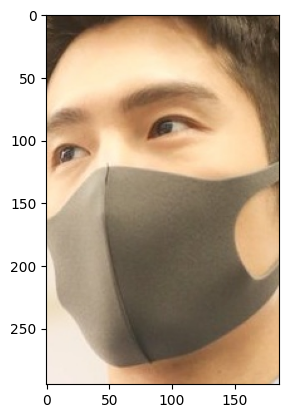

In [24]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_472.jpg')
imgplot = plt.imshow(img)
plt.show()

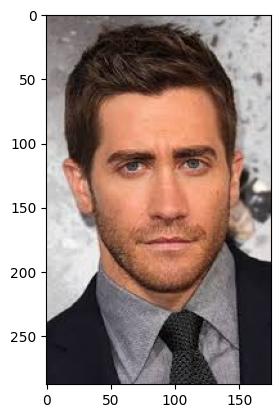

In [33]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_3412.jpg')
imgplot = plt.imshow(img)
plt.show()

In [34]:
# convert images to numpy arrays
# Resize the Images


with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [36]:
type(data)

list

In [37]:
len(data)

7553

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [242, 242, 242],
        [242, 242, 242],
        [242, 242, 242]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[241, 243, 241],
        [254, 255, 253],
        [253, 255, 252],
        ...,
        [211, 183, 179],
        [211, 184, 180],
        [212, 186, 186]],

       [[239, 243, 238],
        [250, 255, 249],
        [249, 255, 248],
        ...,
        [211, 182, 180],
        [210, 182, 179],
        [209, 184, 181]],

       [[229, 232, 228],
        [240, 243, 239],
        [240, 242, 238],
        ...,
        [205, 179, 180],
        [206, 178, 179],
        [206, 180, 177]]], dtype=uint8)
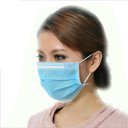

In [82]:
data[41]

In [83]:
type(data[0])

numpy.ndarray

In [84]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [85]:
type(X)

numpy.ndarray

In [86]:
type(Y)

numpy.ndarray

In [87]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [88]:
print(Y)

[1 1 1 ... 0 0 0]


In [89]:
# train test splitingg
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [90]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [91]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[164, 152, 152],
        [164, 152, 152],
        [163, 151, 151],
        ...,
        [207, 183, 179],
        [207, 183, 179],
        [207, 185, 180]],

       [[165, 153, 153],
        [165, 153, 153],
        [164, 152, 152],
        ...,
        [207, 183, 179],
        [207, 183, 179],
        [206, 184, 180]],

       [[166, 154, 154],
        [166, 154, 154],
        [165, 153, 153],
        ...,
        [206, 182, 178],
        [206, 182, 178],
        [205, 183, 179]]], dtype=uint8)
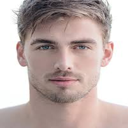

In [128]:
X_train[1]

In [129]:
X_train_scaled[0]

array([[[0.85490196, 0.85882353, 0.83921569],
        [0.85490196, 0.85882353, 0.83921569],
        [0.85490196, 0.85882353, 0.83921569],
        ...,
        [0.81568627, 0.82352941, 0.81176471],
        [0.81568627, 0.82352941, 0.81176471],
        [0.81568627, 0.82352941, 0.81176471]],

       [[0.85490196, 0.85882353, 0.83921569],
        [0.85490196, 0.85882353, 0.83921569],
        [0.85490196, 0.85882353, 0.83921569],
        ...,
        [0.81568627, 0.82352941, 0.81176471],
        [0.81568627, 0.82352941, 0.81176471],
        [0.81568627, 0.82352941, 0.81176471]],

       [[0.85098039, 0.85490196, 0.83529412],
        [0.85098039, 0.85490196, 0.83529412],
        [0.85098039, 0.85490196, 0.83529412],
        ...,
        [0.81568627, 0.82352941, 0.81176471],
        [0.81568627, 0.82352941, 0.81176471],
        [0.81568627, 0.82352941, 0.81176471]],

       ...,

       [[0.85098039, 0.8745098 , 0.82352941],
        [0.85098039, 0.84313725, 0.77254902],
        [0.87058824, 0

In [130]:
#Building a Convolutional Neural Networks (CNN)

import tensorflow as tf
from tensorflow import keras

In [131]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [132]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [133]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 14s 42ms/step - acc: 0.6754 - loss: 0.6859 - val_acc: 0.9041 - val_loss: 0.2505
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - acc: 0.8576 - loss: 0.3307 - val_acc: 0.9008 - val_loss: 0.2246
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.8936 - loss: 0.2630 - val_acc: 0.8975 - val_loss: 0.2301
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9145 - loss: 0.2186 - val_acc: 0.9190 - val_loss: 0.1882
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9159 - loss: 0.2105 - val_acc: 0.8975 - val_loss: 0.2245


In [160]:
#Model Evaluation
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.8923 - loss: 0.2781
Test Accuracy = 0.8868299126625061


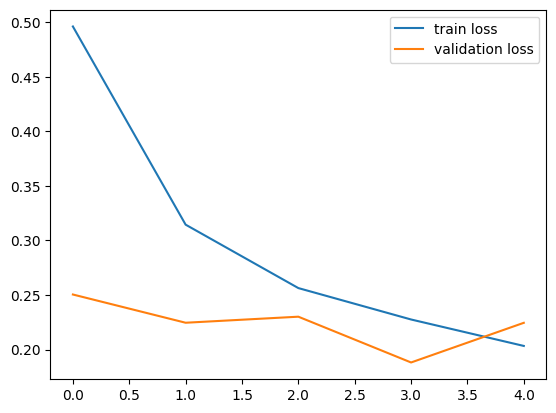

In [161]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

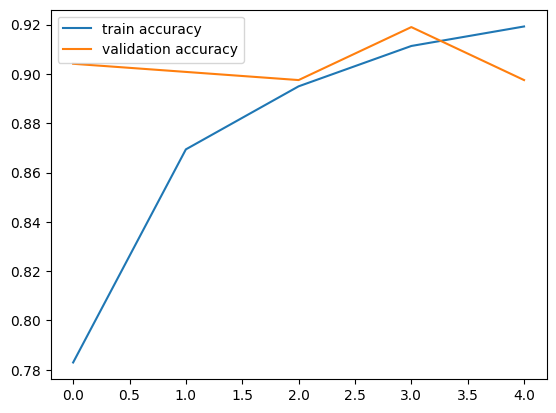

In [162]:
# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/image1.jpg


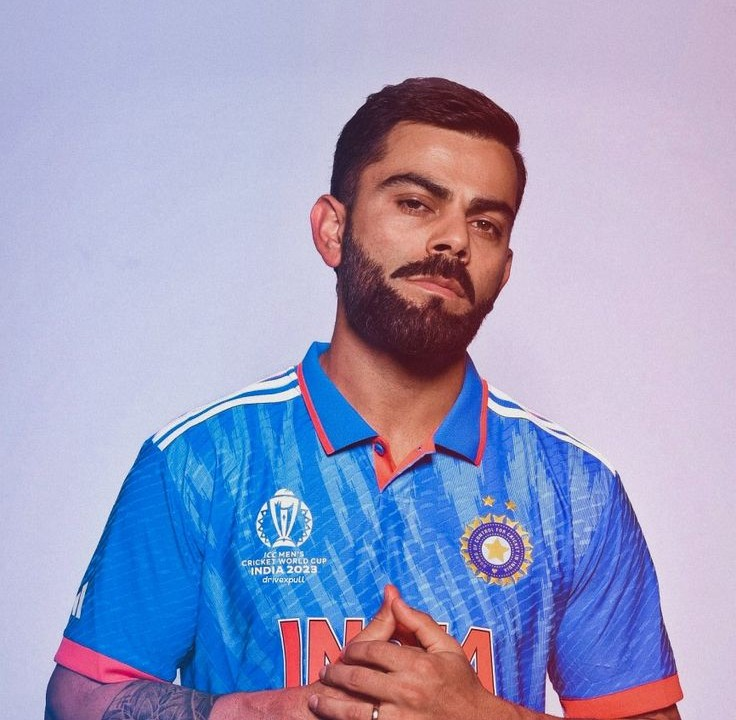

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
[[0.5871214  0.43821886]]
0
The person in the image is not wearing a mask


In [164]:
#Predictive System
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/mask img.jpg


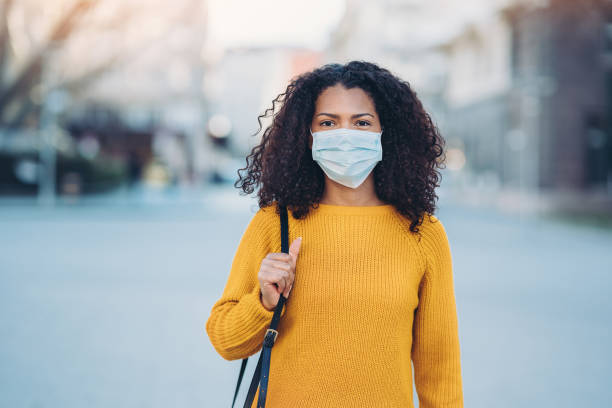

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
[[0.00162193 0.91634804]]
1
The person in the image is wearing a mask


In [156]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')